In [50]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
from material import open_material as om
from scipy.optimize import differential_evolution, minimize
import matplotlib.pyplot as plt

In [59]:
# open measurement file
scan_file = pd.read_csv('./measurement/R_5_B6.csv')
scan = scan_file['SCAN'].values
# open material (LENS)
air = ml.Non_Dispersion(1)
SiO2_LENS = om('SiO2_LENS', 'Sellmeier') 
SiN_LENS = om('SiN_LENS', 'Sellmeier')
ITO_LENS = om('ITO_LENS', 'Sellmeier')
OC_LENS = om('OC_LENS', 'Material')
sodalime = om('sodalime', 'Material')
# open material (SemiLab)
SiO2 = om('SiO2', 'Sellmeier')
SiN = om('SiN', 'Sellmeier')
ITO = om('ITO', 'Sellmeier')
Acrylic = om('Acrylic', 'Sellmeier')
# target 
target_w = np.linspace(400, 700, 301)
target_R = (scan - 0.11)/100
# hypothesis
hypo_R = lambda th: tm.Design(
    [air, OC_LENS, SiN_LENS, SiO2_LENS, ITO_LENS, SiO2_LENS, SiN_LENS, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(target_w, 5)

hypo_R_SL = lambda th: tm.Design(
    [air, Acrylic, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(target_w, 5)

In [ ]:
# fitting (LENS)
FOM_LS = lambda tht: sum((target_R - hypo_R(tht))**2)
sol1_LS = de(FOM_LS, [(1500, 2200), (4, 16), (20, 80), (20, 30), (20, 80), (4, 16)])
print(sol1_LS.x)
print(sol1_LS.message)
sol2_LS = minimize(FOM_LS, sol1_LS.x)

In [90]:
print(sol2_LS.x)
print(sol2_LS.message)

[1706.64353229   14.08243631   34.52249644   29.80300748   42.62248303
    9.67711527]
Optimization terminated successfully.


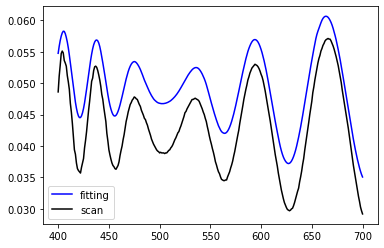

In [89]:
plt.plot(target_w, hypo_R(sol2_LS.x), '-b', label = 'fitting')
plt.plot(target_w, target_R, '-k', label = 'scan')
plt.legend(loc = 'best')
plt.savefig('dia_fit.png')
plt.show()

In [92]:
np.mean(target_R)

0.043349833887043186

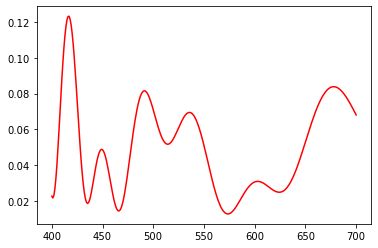

In [108]:
wl = target_w
hypo_R_bridge = lambda th: tm.Design(
    [air, Acrylic, SiN, SiO2, ITO, Acrylic, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], th[6], th[7], None]
).reflectance(target_w, 5)
RRR = hypo_R_bridge([506.6, 14.1, 34.5, 29.8, 1200, 29.8, 42.6, 9.7])
plt.plot(wl,RRR, '-r',label = 'fitting bridge')
plt.savefig('b.png')
plt.show()


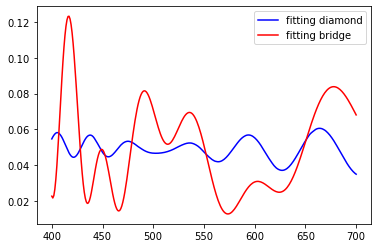

In [106]:
plt.plot(target_w, hypo_R(sol2_LS.x), '-b', label = 'fitting diamond')
plt.plot(wl,RRR, '-r', label = 'fitting bridge')
plt.legend(loc = 'best')
#plt.savefig('com.png')
plt.show()

In [ ]:
# fitting (SemiLab)
FOM_SL = lambda tht: sum((target_R - hypo_R_SL(tht))**2)
sol1_SL = de(FOM_SL, [(1500, 2500), (4, 16), (20, 80), (18, 28), (20, 80), (4, 16)])

[1774.75862029   15.9841322    27.53691745   27.97904492   23.29524057
   13.59291814]
Optimization terminated successfully.


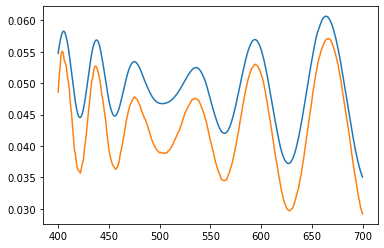

In [75]:
print(sol1_SL.x)
print(sol1_SL.message)
#sol2_SL = minimize(FOM_SL, sol2_LS.x)
#print(sol2_SL.x)
#print(sol2_SL.message)
plt.plot(target_w, hypo_R(sol1_LS.x))
plt.plot(target_w, target_R)
plt.show()